In [1]:
import numpy as np
import seaborn as sns
import matplotlib.colors as clr
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.ticker as ticker
import pandas as pd
import squarify 

In [2]:
sns.set(rc={'figure.figsize':(15,8)})
sns.set(style="white", context="talk")

In [3]:
years = pd.read_csv('acousticbrainz-2015-01-actual-release-years.csv', header=None)

In [4]:
year_counts = pd.Series.value_counts(years[1])

year_counts = year_counts.drop(labels=list(filter(lambda x: (x<1950.0),year_counts.keys())))
year_counts_int = pd.to_numeric(year_counts.keys(), downcast='integer')

quantiles = years[1].quantile([0.25,0.5,0.75])

In [5]:
quantiles = quantiles - 1950

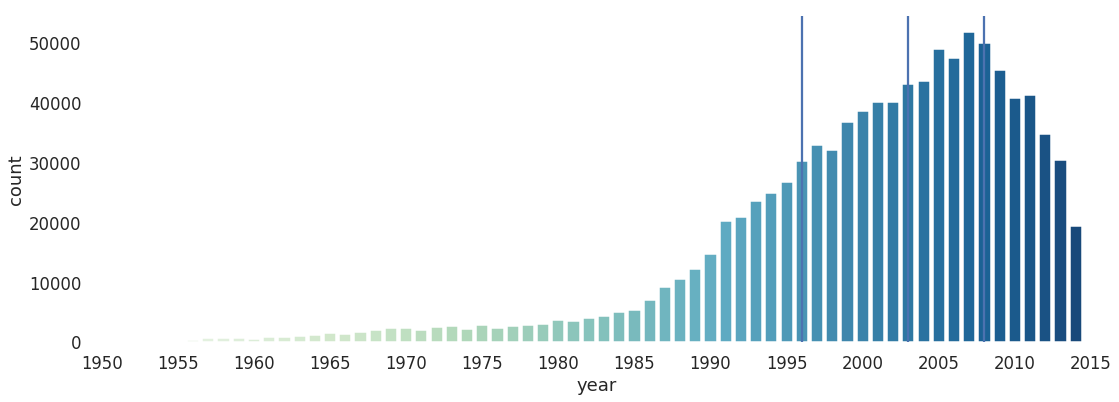

In [6]:
plt.figure(figsize=(18,6))

ax = sns.barplot(x=year_counts_int, y=year_counts, palette='GnBu')

labels = []

for label in ax.get_xticklabels():
    if label not in ax.get_xticklabels()[0::5]:
        labels.append(plt.text(0, 0, ''))
    else:
        labels.append(label)

ax.set_xticklabels(labels, ha="center")

plt.axvline(quantiles[0.25], 0, 1)
plt.axvline(quantiles[0.50], 0, 1)
line = plt.axvline(quantiles[0.75], 0, 1)

plt.ylabel('count')
plt.xlabel('year')
sns.despine(left=True, bottom=True)
plt.show()


In [7]:
features = pd.read_csv('ab-2017-01-23-loudness-features.csv')

In [15]:
y_dict = dict(zip(years[0], years[1]))

avg_loudness = features['average_loudness']
f_mbids = features['recording_mbid']
l_dict = dict(zip(f_mbids, avg_loudness))

In [23]:
x = []
y = []
for mbid in y_dict:
    
    if mbid in l_dict and y_dict[mbid] >= 1950.0: 
        x.append(y_dict[mbid])
        y.append(l_dict[mbid]) 
        
x_int = pd.to_numeric(x, downcast='integer')

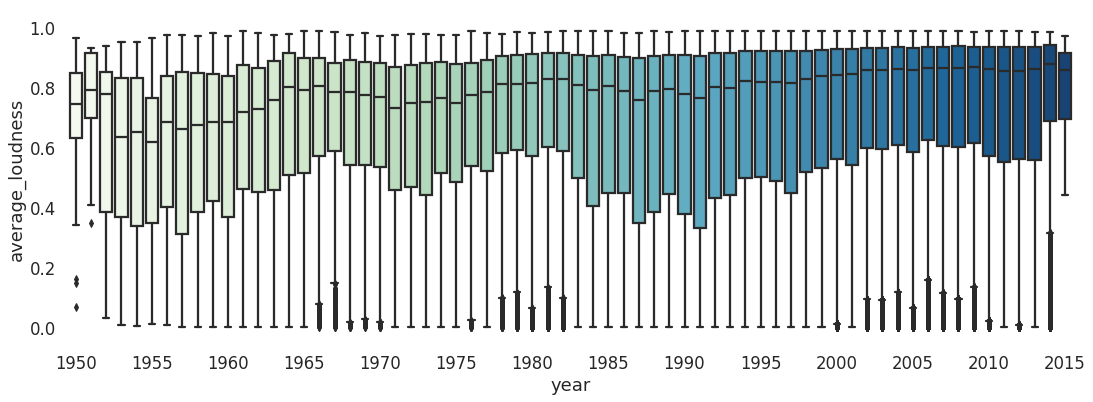

In [24]:
plt.figure(figsize=(18,6))
ax = sns.boxplot(x=x_int, y=np.array(y), palette='GnBu')
ax.set_xticklabels(labels, ha="center")

plt.ylabel('average_loudness')
plt.xlabel('year')
sns.despine(left=True, bottom=True)
plt.show()

In [18]:
ll_features = pd.read_csv('ab-2017-01-23-lowlevel-features.csv', low_memory=False)

In [19]:
f_mbid = ll_features['recording_mbid']
bpm = ll_features['bpm']
f_dict = dict(zip(f_mbid, bpm))

In [25]:
x = []
y = []
for mbid in y_dict:
    
    if mbid in f_dict and y_dict[mbid] >= 1950.0: 
        x.append(y_dict[mbid])
        y.append(f_dict[mbid]) 
        
x_int = pd.to_numeric(x, downcast='integer')

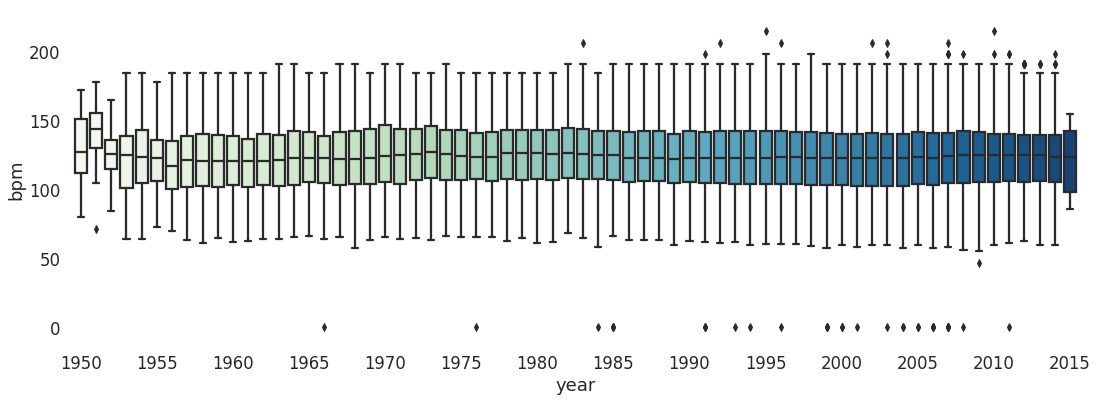

In [26]:
plt.figure(figsize=(18,6))
ax = sns.boxplot(x=x_int, y=np.array(y), palette='GnBu')
ax.set_xticklabels(labels, ha="center")

plt.ylabel('bpm')
plt.xlabel('year')
sns.despine(left=True, bottom=True)
plt.show()